# Doğrusal Olmayan Regreson Modelleri

In [197]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [3]:
hit = pd.read_csv(r"C:\Users\20190855029\data_ML\Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors

5

In [7]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [8]:
y_pred = knn_model.predict(X_test)

  File "C:\Users\20190855029\AppData\Local\anaconda3\envs\spyder\Lib\site-packages\joblib\externals\loky\backend\context.py", line 251, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\20190855029\AppData\Local\anaconda3\envs\spyder\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\20190855029\AppData\Local\anaconda3\envs\spyder\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\20190855029\AppData\Local\anaconda3\envs\spyder\Lib\subprocess.py", line 1493, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [10]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [15]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
knn_cv_model.best_params_["n_neighbors"]

8

In [17]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [18]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [19]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [20]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR (Destek Vektör Regresyonu)

In [22]:
hit = pd.read_csv(r"C:\Users\20190855029\data_ML\Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [23]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [24]:
from sklearn.svm import SVR

In [40]:
svr_model = SVR(kernel="linear").fit(X_train,y_train)

In [41]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [42]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [43]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [45]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [49]:
svr_model.predict([[91.0]])

array([403.52804878])

In [50]:
y_pred = svr_model.predict(X_train)

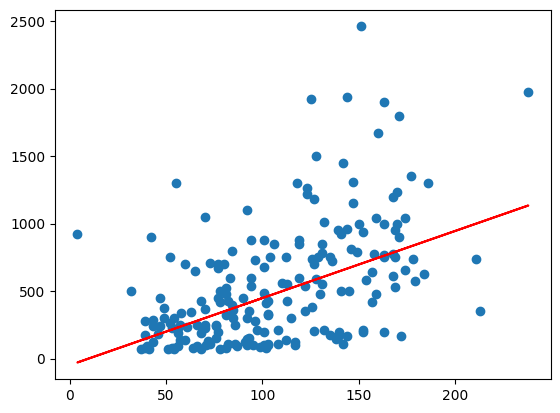

In [51]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [52]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [53]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

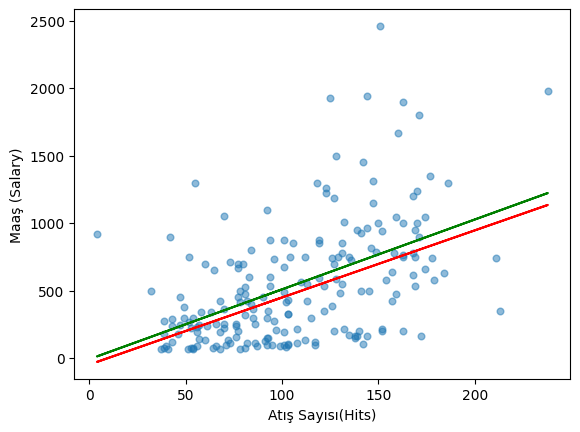

In [56]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [57]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [58]:
svr_model.predict([[91]])

array([403.52804878])

In [59]:
y_pred = svr_model.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [62]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [63]:
svr_model

SVR(kernel='linear')

In [67]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [68]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [69]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [70]:
y_pred = svr_tuned.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [72]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [73]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [74]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

TypeError: SVR.__init__() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

NameError: name 'svr_pred' is not defined

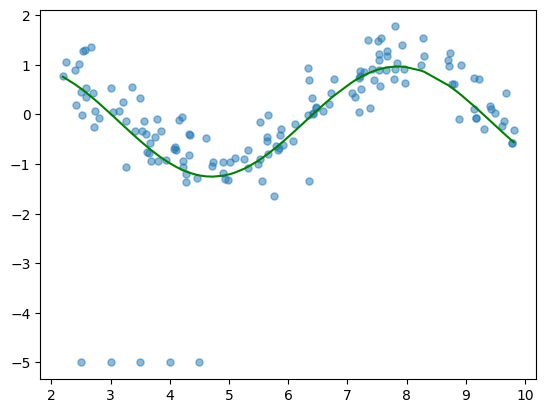

In [75]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [77]:
hit = pd.read_csv(r"C:\Users\20190855029\data_ML\Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [79]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

## Tahmin

In [80]:
y_pred = svr_rbf.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [83]:
svr_rbf

SVR()

In [84]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [85]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [87]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [88]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# Çok Katmanlı Algılayıcı

In [89]:
hit = pd.read_csv("data_ML/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [95]:
X_train_scaled = scaler.transform(X_train)

In [96]:
from sklearn.neural_network import MLPRegressor

In [97]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [98]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [99]:
mlp_model.n_layers_

4

In [100]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin

In [101]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
y_pred = mlp_model.predict(X_test_scaled)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))

479.1527219913483

## Model Tuning

In [103]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [104]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [105]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [106]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [107]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [108]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [109]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [110]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [111]:
np.sqrt(mean_squared_error(y_test, y_pred))

352.2481485016455

# CART

In [113]:
hit = pd.read_csv("data_ML/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [114]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [115]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [116]:
?cart_model

In [117]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

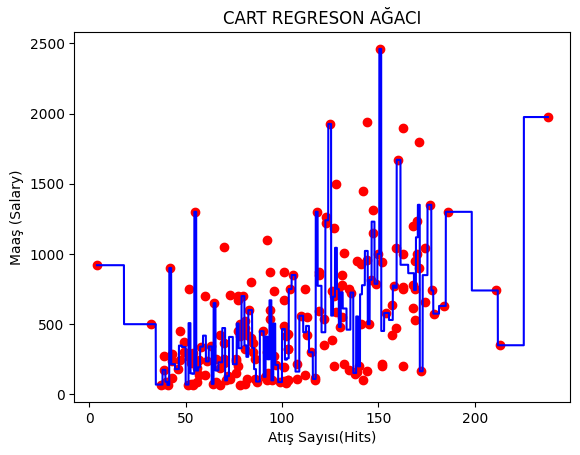

In [118]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [ ]:
#!pip install skompiler

In [119]:
from skompiler import skompile

ModuleNotFoundError: No module named 'skompiler'

In [ ]:
print(skompile(cart_model.predict).to('python/code'))

## Tahmin

In [ ]:
x = [91]

In [ ]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

In [120]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [121]:
cart_model.predict([[91]])

array([125.])

In [122]:
y_pred =cart_model.predict(X_test)

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [124]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [126]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [127]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [128]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [129]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [134]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [135]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [136]:
y_pred = cart_tuned.predict(X_test)

In [137]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

# Bagged Trees Regresyon

In [138]:
hit = pd.read_csv("data_ML/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [139]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [140]:
bag_model.n_estimators

10

In [141]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1686320658),
 DecisionTreeRegressor(random_state=2106270115),
 DecisionTreeRegressor(random_state=604160287),
 DecisionTreeRegressor(random_state=1818112300),
 DecisionTreeRegressor(random_state=1144551074),
 DecisionTreeRegressor(random_state=1634764234),
 DecisionTreeRegressor(random_state=820974251),
 DecisionTreeRegressor(random_state=1387516839),
 DecisionTreeRegressor(random_state=2009973545),
 DecisionTreeRegressor(random_state=1391412095)]

In [142]:
bag_model.estimators_samples_

[array([175, 142,  67, 175,  63,  74,  42, 124, 165, 168,  50, 105,  87,
        122,  11,  42, 155, 191,  83, 175,  96,  59,  71,  70, 172, 113,
        119, 169, 192,   7, 104, 126, 179, 153,  50,  43,  12,  24,  42,
        170, 173, 169,  43,  89,  91, 196,  17,  52,  67, 125, 128,  33,
        180, 143, 149,  64, 144, 191,  65,   9,  87, 180,  83, 137, 130,
        103, 137, 151, 119, 174, 105, 133,  65,  16,  41,   5,  18, 177,
        140,  36, 126, 142,  57, 150, 172,  32, 123,  64, 168,   0, 126,
          8, 116,  85,  19,   7,  28, 194, 146, 143, 153,  34,  19,  91,
        137, 172,  11,  65,  48,  75,  42,  65, 108, 184, 174,  81, 125,
         27,  12,  71,  98, 186,   5,  92, 178, 162,  12,  28, 138,  65,
         22, 117, 160, 145, 177, 155, 164, 184, 125,  98,  40, 131, 159,
        188, 193,  87,  71, 147, 196, 184,  76, 139,  22,  33,  48, 105,
         86, 166, 158,  57, 179, 139, 177,  31,  29, 142,  72, 139,  47,
         74,   6, 116, 118,  76,  80, 143, 144,  76

In [143]:
bag_model.estimators_features_

[array([18, 16,  6,  7, 10,  8,  3, 11,  2,  1, 11,  8,  6,  4,  1, 14, 16,
        15, 18]),
 array([ 3, 14,  7, 11,  0, 18,  4,  8, 12,  4, 14, 14,  4, 14, 13,  4,  4,
         6, 15]),
 array([ 4, 15, 16,  9, 11, 18,  5, 14,  6, 17,  3, 12,  2,  5,  2,  4,  0,
         9, 14]),
 array([12,  9,  7, 13, 18, 11, 13,  0,  4, 13, 10,  1,  8, 17, 14, 13, 13,
        13, 11]),
 array([ 2, 15,  3, 14,  2,  5,  5, 12, 15, 18,  1,  1, 18,  8, 12,  7,  0,
        18,  3]),
 array([10, 18,  2,  1,  8, 17,  1, 14, 15, 13, 13,  0, 15, 13, 13, 14, 15,
        18,  1]),
 array([11, 16,  7,  6, 17,  9, 14,  4,  9,  9,  2,  5, 17,  3, 10, 11,  6,
        11,  8]),
 array([ 7,  7, 17,  2,  7,  5, 10, 13,  9,  5, 16, 18, 17,  8, 13, 16, 12,
         6, 12]),
 array([ 9,  0, 12,  8,  0, 16,  0,  3,  5, 15, 17, 10,  2,  9,  5,  0, 11,
        14,  7]),
 array([17, 11, 17,  1, 13,  9, 15,  8, 15,  7,  4,  4,  2, 11, 17, 11, 15,
        13, 10])]

In [144]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=2106270115)

## Tahmin

In [145]:
y_pred = bag_model.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test, y_pred))

320.38327104200926

In [147]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [148]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

445.7674062884888

In [149]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

455.64261004094453

# Model Tuning

In [151]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [152]:
bag_params = {"n_estimators": range(2,20)}

In [153]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [154]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [155]:
bag_cv_model.best_params_

{'n_estimators': 6}

In [160]:
bag_tuned = BaggingRegressor( n_estimators = 6, random_state = 45)

In [161]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=6, random_state=45)

In [162]:
y_pred = bag_tuned.predict(X_test)

In [163]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.8237164204555

# Random Forests

In [165]:
hit = pd.read_csv("data_ML/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
rf_model = RandomForestRegressor(random_state = 42)

In [168]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [169]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [170]:
y_pred = rf_model.predict(X_test)

In [171]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [172]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [173]:
rf_model = RandomForestRegressor(random_state = 42)

In [174]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [175]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [176]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [177]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [178]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [179]:
y_pred = rf_tuned.predict(X_test)

In [180]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.0444474856193

In [181]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

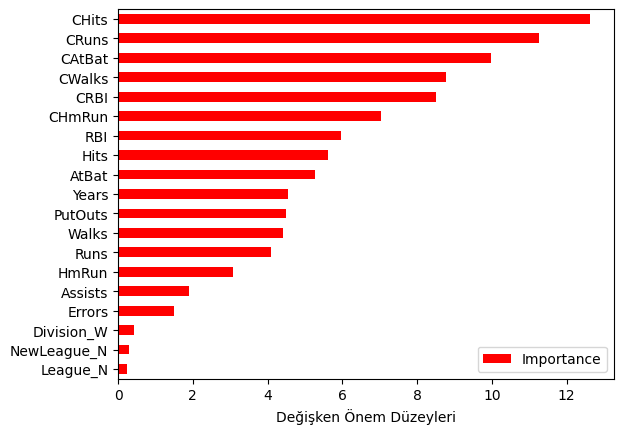

In [182]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [183]:
from sklearn.ensemble import GradientBoostingRegressor

In [184]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [185]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

342.9317908992801

## Model Tuning

In [186]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [187]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [188]:
gbm_cv_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 100,
 'n_estimators': 2000,
 'subsample': 0.5}

In [193]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 100, 
                                      n_estimators = 2000, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [194]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

333.46328907025884

In [199]:
gbm = GradientBoostingRegressor()
gbm_tuned_ran = RandomizedSearchCV(gbm,gbm_params,n_iter=40, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [200]:
gbm_tuned_ran.best_params_

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.01}

In [201]:
gbm_tuned_ = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 8, 
                                      n_estimators = 500, 
                                      subsample = 0.5)

gbm_tuned_ = gbm_tuned_.fit(X_train,y_train)

In [205]:
y_pred = gbm_tuned_.predict(X_test)

In [206]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.19187827214637

In [207]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

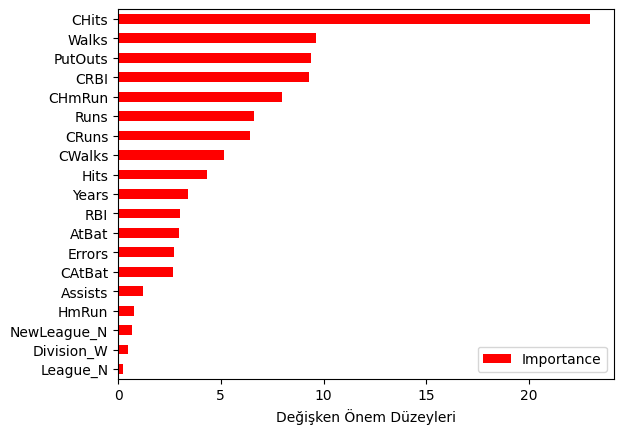

In [208]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
xgb_model

In [ ]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Light GBM

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
#!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))